# Read the XMI25Element StructureModel and retrieve all the necessary elements for Genetic Algorithms

In [1]:
#Author: Habibi Husain Arifin
#Created Date: 14 December 2018
#Last Updated Date: 10 January 2019
#Version: 1.0
#<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

#Requirement:
#*It is only work for CSM/MD 19.0
#*It needs .xmi/.xml from UML 2.5.*

#Used documents:
#*OMG SysML Specification 1.5 - Informative: 1.5 formal-17-05-02.pdf

import xml.etree.ElementTree as ET
import datetime as DT
import re as RE

#Namespace
MD_Customization_for_Requirements__additional_stereotypes_NS = "http://www.magicdraw.com/spec/Customization/180/SysML"
MD_Customization_for_SysML__additional_stereotypes_NS = "MD_Customization_for_SysML__additional_stereotypes:"
#MD_Customization_for_SysML_MassRollUpPattern_NS = "MD Customization for SysML::analysis patterns::rollup patterns::MassRollUpPattern::"
GAProfile_NS = "http://www.magicdraw.com/schemas/GAProfile.xmi"
XMI_NS = "http://www.omg.org/spec/XMI/20131001"
UML_NS = "http://www.omg.org/spec/UML/20131001"
SYSML_NS = "http://www.omg.org/spec/SysML/20150709/SysML"

#Tag Name
MD_STEREOTYPE_REQUIREMENT_PART_PROPERTY = "{" + MD_Customization_for_Requirements__additional_stereotypes_NS + "}PartProperty"
MD_STEREOTYPE_REQUIREMENT_VALUE_PROPERTY = "{" + MD_Customization_for_Requirements__additional_stereotypes_NS + "}ValueProperty"
MD_STEREOTYPE_REQUIREMENT_CONSTRAINT_PARAMETER = "{" + MD_Customization_for_Requirements__additional_stereotypes_NS + "}ConstraintParameter"
MD_STEREOTYPE_REQUIREMENT_CONSTRAINT_PROPERTY = "{" + MD_Customization_for_Requirements__additional_stereotypes_NS + "}ConstraintProperty"
GAProfile_SOI = "{" + GAProfile_NS + "}SOI"
GAProfile_GAGene = "{" + GAProfile_NS + "}GAGene"
GAProfile_FitnessValue = "{" + GAProfile_NS + "}FitnessValue"
SYSML_BLOCK = "{" + SYSML_NS + "}Block"
SYSML_CONSTRAINT_BLOCK = "{" + SYSML_NS + "}ConstraintBlock"
SYSML_VALUE_TYPE = "{" + SYSML_NS + "}ValueType"
SYSML_MOE = "{" + SYSML_NS + "}moe"
SYSML_BINDING_CONNECTOR = "{" + SYSML_NS + "}BindingConnector"
SYSML_NESTED_CONNECTOR_END = "{" + SYSML_NS + "}NestedConnectorEnd"
SYSML_REQUIREMENT = "{" + SYSML_NS + "}Requirement"
PACKAGED_ELEMENT = "packagedElement"
PARENT_ELEMENT = "parentElement"
OWNED_ATTRIBUTE = "ownedAttribute"
OWNED_RULE = "ownedRule"
OWNED_CONNECTOR = "ownedConnector"
LOWER_VALUE = "lowerValue"
UPPER_VALUE = "upperValue"
REFERENCE_EXTENSION = "referenceExtension"
BODY = "body"
SPECIFICATION = "specification"
END = "end"
DEFAULT_VALUE = "defaultValue"
STEREOTYPES_HREFS = "stereotypesHREFS"
STEREOTYPE = "stereotype"
APPLIED_STEREOTYPE_INSTANCE = "appliedStereotypeInstance"
GENERAL = "general"

#Attribute Name
XMI_ID = "{" + XMI_NS + "}id"
XMI_TYPE = "{" + XMI_NS + "}type"
XMI_EXTENSION = "{" + XMI_NS + "}Extension"
NAME = "name"
ID = "ID"
ASSOCIATION = "association"
TYPE = "type"
VALUE = "value"
ROLE = "role"
REFERENT_TYPE = "referentType"
REFERENT_PATH = "referentPath"
AGGREGATION = "aggregation"
BASE_PROPERTY = "base_Property"
BASE_CLASS = "base_Class"
BASE_DATA_TYPE = "base_DataType"
BASE_CONNECTOR = "base_Connector"
BASE_CONNECTOR_END = "base_ConnectorEnd"
BASE_PORT = "base_Port"
EXTENDER = "extender"
STEREOTYPE_HREF = "stereotypeHREF"
CLASSIFIER = "classifier"

#Attribute Value
COMPOSITE = "composite"
UML_GENERALIZATION = "uml:Generalization"
UML_CONSTRAINT = "uml:Constraint"
UML_DATA_TYPE = "uml:DataType"
UML_PROPERTY = "uml:Property"
UML_PORT = "uml:Port"
UML_CLASS = "uml:Class"
UML_CONNECTOR = "uml:Connector"
UML_CONNECTOR_END = "uml:ConnectorEnd"
UML_LITERAL_REAL = "uml:LiteralReal"
UML_LITERAL_INTEGER = "uml:LiteralInteger"
DATA_TYPE = "DataType"
MD_STEREOTYPE_SYSML_VALUE_PROPERTY = MD_Customization_for_SysML__additional_stereotypes_NS + "ValueProperty"
MD_STEREOTYPE_SYSML_PART_PROPERTY = MD_Customization_for_SysML__additional_stereotypes_NS + "PartProperty"
MD_STEREOTYPE_SYSML_CONSTRAINT_PROPERTY = MD_Customization_for_SysML__additional_stereotypes_NS + "ConstraintProperty"
#MD_MASS_ROLLUP_PATTERN_MASS = MD_Customization_for_SysML_MassRollUpPattern_NS + "mass"
#MD_MASS_ROLLUP_PATTERN_TOTAL_MASS = MD_Customization_for_SysML_MassRollUpPattern_NS + "totalMass"
#MD_MASS_ROLLUP_PATTERN_SUB_MASS = MD_Customization_for_SysML_MassRollUpPattern_NS + "subMass"
#MD_MASS_ROLLUP_PATTERN_SUM = MD_Customization_for_SysML_MassRollUpPattern_NS + "sum"
MAGICDRAW_UML_190 = "MagicDraw UML 19.0"
HREF = "href"

#Stereotype
PART_PROPERTY = "PartProperty"
VALUE_PROPERTY = "ValueProperty"
PORT_PROPERTY = "PortProperty"
CONSTRAINT_BLOCK = "ConstraintBlock"
CONSTRAINT_PARAMETER = "ConstraintParameter"
CONSTRAINT_PROPERTY = "ConstraintProperty"
MOE = "MOE"
BLOCK = "Block"
BINDING_CONNECTOR = "BindingConnector"
NESTED_CONNECTOR_END = "NestedConnectorEnd"
VALUE_TYPE = "ValueType"
REQUIREMENT = "Requirement"

#Misc: Used internally only for this plugin
LEVEL = "level"
ELEMENT = "element"
FITNESS_VALUE = "FitnessValue"
GA_GENE = "GAGene"
SOI = "SOI"
BINDED = "binded"
GENERALIZATION = "generalization"
OWNED = "owned"
TOTAL = "total"
ROLL_UP_PATTERN = "RollUpPattern"

#Global Variables
#tree = ET.parse(FILE_PATH)
#root = tree.getroot()

class Logger():
    #LogType
    DEBUG = "DEBUG"
    INFO = "INFO"
    WARNING = "WARNING"
    ERROR = "ERROR"
    
    #For printing log
    @staticmethod
    def printLog(logType, classElement, functionElement, attrib=None):
        switcher = {DEBUG:"\n" + Colors.OKBLUE, INFO:"\n" + Colors.OKGREEN, WARNING:"\n" + Colors.WARNING, ERROR:"\n" + Colors.FAIL}
        print(switcher.get(logType), logType, classElement, functionElement.__name__, attrib, Colors.ENDC)

class Colors():
    HEADER = "\033[95m"
    OKBLUE = "\033[94m"
    OKGREEN = "\033[92m"
    WARNING = "\033[93m"
    FAIL = "\033[91m"
    ENDC = "\033[0m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    
    #Return font color based on level counter
    @staticmethod
    def getFontColorByLevel(level):
        switcher = {0: Colors.UNDERLINE, 1:Colors.FAIL, 2:Colors.OKGREEN, 3:Colors.WARNING, 4:Colors.OKBLUE, 5:Colors.FAIL, 6:Colors.OKGREEN, 7:Colors.WARNING, 8:Colors.OKBLUE, 9:Colors.FAIL, 10:Colors.OKGREEN, 11:Colors.WARNING, 12:Colors.OKBLUE, 13:Colors.FAIL, 14:Colors.OKGREEN, 15:Colors.WARNING, 16:Colors.OKBLUE, 17:Colors.FAIL, 18:Colors.OKGREEN, 19:Colors.WARNING, 20:Colors.OKBLUE}
        return switcher.get(level)    
    
class XPathHelper():  
    #Return the xPath string, return None if it is failed
    @staticmethod
    def getFirstChild(tagName, attribName, attribValue):
        obj = ".//" + tagName + "/[@" + attribName + "='" + attribValue + "']"
        return obj
    
    #Return how many repetition of the character based on counter/level
    #Return "" if counter is 0
    #Return None if it is failed
    @staticmethod
    def getRepeatedChar(char, counter):
        obj = ""
        i = 0
        while i < counter:
            obj += char
            i += 1
        return obj

class Counter():
    @staticmethod
    def setCounterForFirstTime(counters, length):
        if counters == {} or counters == [] or counters == None:
            for i in range(0, length):
                counters.append(0)
        return counters
    
class Util():
    #Return None if no Property with the given Id
    @staticmethod
    def getElementById(id, root):
        for child in root.iter("*"):
            if child.get(XMI_ID) == id or child.get(ID) == id:
                return child
    
    @staticmethod
    def getElementId(element):
        if element.get(XMI_ID) != None:return element.get(XMI_ID)
        elif element.get(ID) != None:return element.get(ID)
        else:return None
        
    #Return None if it is failed/error
    #Source: https://stackoverflow.com/questions/2170610/access-elementtree-node-parent-node
    @staticmethod
    def getParentMap(root):
        parentMap = {child:parent for parent in root.iter() for child in parent}
        return parentMap
    
    #Return None if it is failed/error
    #Return None if no ParentElement of the given element
    @staticmethod
    def getParentElement(element, root):
        parentMap = Util.getParentMap(root)
        if element in parentMap:return parentMap.get(element)
        else:return None
    
    #Return None if no ChildrenElement of the given element
    @staticmethod
    def getChildrenElements(element):
        objs = []
        for child in element.findall("*"):
            objs.append(child)
        
        if objs == []:return None
        else:return objs
    
    #Return None if no BindedElement of ValueProperty:
    @staticmethod
    def getBindedElements(element,root):
        objs = []
        roleId = Util.getElementId(element)
        bindCons = Connector.getBindingConnectorsByRoleId(roleId, root)
        if bindCons != None:
            for bindCon in bindCons:                        
                bCStereos = StereotypeHelper.getStereotypes(bindCon, root)
                for nCEnd in Connector.getNestedConnectorEndsByBindingConnector(bindCon, root):
                    nCEndRoleId = Connector.getNestedConnectorEndRoleId(nCEnd)
                    
                    #Test print
                    #if Util.getElementId(nCEnd) == "_18_5_2_bac02e1_1526371226613_464480_44607":
                    #    print("nCEnd:", nCEnd.tag, nCEnd.attrib, "RoleId:", nCEndRoleId)
                    
                    if nCEndRoleId == roleId:
                        nNCEnd = Connector.getNeighborNestedConnectorEnd(nCEnd, root)
                        nNCEndRoleId = Connector.getNestedConnectorEndRoleId(nNCEnd)
                        obj = Util.getElementById(nNCEndRoleId, root)
                        objs.append(obj)
        if objs == []:return None
        else: return objs

#Metaclass Class: Block, ConstraintBlock , Requirement
"""
OMG SysML Spec 1.5 (Page 51, 104)
"""
class Class():
    #Return None if no block with the given name
    @staticmethod
    def getBlockByName(name, root):
        for child in root.iter(PACKAGED_ELEMENT):
            if child.get(NAME) == name:
                if StereotypeHelper.isBlock(child, root):return child
                else:return None

#Metaclass Constraint:
class Constraint():
    #Return None if no ConstraintRule
    @staticmethod
    def getRuleByConstraintBlock(element):
        obj = element.find(OWNED_RULE)
        if MetaclassHelper.isConstraint(obj): return obj
        else:return None
            
    #Return None if no Specification
    @staticmethod
    def getSpecificationByConstraintBlock(element):
        rule = Constraint.getRuleByConstraintBlock(element)
        obj = rule.find(SPECIFICATION).find(BODY).text
        return obj
    
    @staticmethod
    def getOutputOfConstraintBlock(element):
        #formula -> "x = a + b"
        #operation -> {"x ", " a + b"}
        formula = Constraint.getSpecificationByConstraintBlock(element)
        operation = RE.split("\s=", formula)
        return operation[0]
    
    #Return True if output
    @staticmethod
    def isOutputParameter(constPar, constBlock):
        #print("Port:", constPar.get(NAME), "; Output:", Constraint.getOutputOfConstraintBlock(constBlock))
        if constPar.get(NAME) == Constraint.getOutputOfConstraintBlock(constBlock):return True
        else:return False
            

#Metaclass Connector:
class Connector():
    #Return None if it has no RoleId
    #Example 1 (Without RoleId): <end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526371226613_464480_44607'>
    #<role href='MD_customization_for_SysML.mdzip#_18_3_903028d_1448291312293_412848_13892'>
    #<xmi:Extension extender='MagicDraw UML 19.0'>
    #<referenceExtension referentPath='MD Customization for SysML::analysis patterns::rollup patterns::MassRollUpPattern::totalMass' referentType='Property'/>
    #</xmi:Extension>
    #</role>
    #</end>
    #Example 2 (With RoleId): <end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526371226613_715226_44608' role='_18_5_2_bac02e1_1526367685993_432339_14859'/>
    @staticmethod
    def getNestedConnectorEndRoleId(element):
        if element.get(ROLE) != None:return element.get(ROLE)
        elif element.find(ROLE) != None:
            href = element.find(ROLE).get(HREF)
            if href != None:
                hrefs = RE.split("#", href)
                roleId = hrefs[len(hrefs)-1] 
                return roleId
            else:return None
        else:return None
    
    #Return None if it is error/failed 
    #Return None if no NestedConnectorEnd with the given Role Id
    #Example 1(With partWithPort): <end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526449840972_589356_64509' partWithPort='_18_5_2_bac02e1_1526372996407_117053_46341' role='_18_5_2_bac02e1_1526372803580_845544_46058'/>
    #Example 2(Without partWithPort): <end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526449840972_156184_64510' role='_18_5_2_bac02e1_1526287379914_309505_15031'/>
    @staticmethod
    def getNestedConnectorEndsByRoleId(roleId, root):
        objs = []
        for child in root.iter(END):
            childRoleId = Connector.getNestedConnectorEndRoleId(child)
            if childRoleId == roleId:
                #Need to find out the difference between Stereotype and Non-stereotype for NestedConnectorEnds, related to part with ports
                if StereotypeHelper.isNestedConnectorEnd(child, root):objs.append(child)
                else:objs.append(child)
        if objs == []:return None
        else: return objs
        
    #Return None if no BindingConnector 
    @staticmethod
    def getBindingConnectorsByRoleId(roleId, root):
        objs = []
        nConEnds = Connector.getNestedConnectorEndsByRoleId(roleId, root)
        if nConEnds != None:
            for nConEnd in nConEnds:
                bindCon = Util.getParentElement(nConEnd, root)
                if StereotypeHelper.isBindingConnector(bindCon, root):objs.append(bindCon)
        if objs == []:return None
        else: return objs
    
    #Return None if no NestedConnectorEnd under the given Binding Connector
    #Return None if it is failed/error
    @staticmethod
    def getNestedConnectorEndsByBindingConnector(element, root):   
        objs = []
        for child in element.findall(END):
            #Need to find out what the difference between stereotype as NestedConnectorEnd or not
            if StereotypeHelper.isNestedConnectorEnd(child, root):objs.append(child)
            else:objs.append(child)
        if objs == []:return None
        else: return objs

    #Return None if no NeighborNesterConnectorEnd from the given BindingConnector
    #Return None if it is failed
    #Example: <ownedConnector xmi:type='uml:Connector' xmi:id='_18_5_2_bac02e1_1526447599256_765773_63243' visibility='public'>
    #<end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526447599257_91478_63244' partWithPort='_18_5_2_bac02e1_1526447364095_119915_62661' role='_18_5_2_bac02e1_1526443114503_622076_62354'/>
    #<end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526447599257_216431_63245' role='_18_5_2_bac02e1_1526367685993_432339_14859'/>
    #</ownedConnector>
    """
    OMG SysML Spec 1.5 (Pg. 52)
    """
    @staticmethod
    def getNeighborNestedConnectorEnd(element, root):
        elId = Util.getElementId(element)
        bindCon = Util.getParentElement(element, root)
        nNCEnds = Connector.getNestedConnectorEndsByBindingConnector(bindCon, root) 
        for nNCEnd in nNCEnds:
            nNCEndId = Util.getElementId(nNCEnd)
            if nNCEndId != elId:return nNCEnd

#Metaclass Property: Distributed Property, Participant Property, ConnectorProperty, moe
"""
OMG SysML Spec 1.5 (Page 51)
"""
class Property():    
    #Get multiplicty of a part property
    #By default it will return a dictionary {LOWER_VALUE : None, UPPER_VALUE : None}
    @staticmethod
    def getMultiplicityOfPartProperty(element):
        objs = {LOWER_VALUE : None, UPPER_VALUE : None}

        #Get lowerValue element
        lows = element.iter(LOWER_VALUE)
        for low in lows:
            objs[LOWER_VALUE] = low.get(VALUE)

        #Get upperValue element
        ups = element.iter(UPPER_VALUE)
        for up in ups:
            objs[UPPER_VALUE] = up.get(VALUE)

        return objs
    
#Metaclass DataType: Value Type
"""
OMG SysML Spec 1.5 (Page 51)
"""
class DataType():
    #Return None if there is no value type
    #Example(with type): <ownedAttribute xmi:type='uml:Property' xmi:id='_18_5_2_bac02e1_1526367758351_60564_43773' name='maxSpeed' aggregation='composite' isDerived='true' type='_18_5_2_bac02e1_1526372219229_343036_45772'>
    #Example(without type): <ownedAttribute xmi:type='uml:Property' xmi:id='_18_5_2_bac02e1_1526370824596_154403_15540' name='maxPowerOutput' aggregation='composite' isDerived='true'>
    @staticmethod
    def getValueType(element, root):
        if element.get(TYPE) == None:
            #Get value type if type = None
            if element.find(TYPE) != None:
                child = element.find(TYPE).find(XMI_EXTENSION).find(REFERENCE_EXTENSION)
                if child.get(REFERENT_TYPE) == DATA_TYPE:return child.get(REFERENT_PATH)
                else:return None
            else:return None
        else:
            #Get value type of type != None
            child = Util.getElementById(element.get(TYPE), root)
            if StereotypeHelper.isValueType(child, root):return child.get(NAME)
            else:return None
    
    #Return None if there is no Unit on given ValueType
    #Example - Input: "ISO-80000::ISO80000-4 Mechanics::Quantities::mass::mass[kilogram]"
    #Example - Output: ""
    """
    OMG SysML Spec 1.5 (Page 47): 8.3.1.1.11.1 Units on value properties
    Value properties can optionally display the unit’s symbol in parentheses if value type has a unit defined.
    If no unit symbol is defined, then the unit name can optionally be displayed.
    <vpname> ":" <valueTypename> [" (" <unitSymbol | unitName> ")"]
    e.g., distance:Length (m)
    """
    @staticmethod
    def getUnitOnValueType(element):
        if element != None:
            objs1 = RE.split("\[", element)
            objs2 = RE.split("\]", objs1[len(objs1)-1])
            #Compare whether the the splits are success, and it can find the "{}"
            if objs1[len(objs1)-1] != objs2[len(objs2)-2]:
                obj = objs2[len(objs2)-2]
                return obj
            else:return None
        else:return None

    #Return None if there is no DefaultValue on ValueProperty
    #Example: <defaultValue xmi:type='uml:LiteralReal' xmi:id='_18_5_2_bac02e1_1526478797760_496169_52106' value='0.5'/>
    @staticmethod
    def getDefaultValue(element):
        defValue = element.find(DEFAULT_VALUE)
        if defValue != None:return defValue.get(VALUE)
        else:return None

#The functions below this line
#Only work for CSM/MD 19.0
#Metaclass Checker:

class MetaclassHelper():
    #Return None if no block with the given Id   
    @staticmethod
    def getMetaclassById(typeId, root):
        for child in root.iter("*"):
            if child.get(XMI_ID) == typeId:return child
    
    #Return False by default
    @staticmethod
    def isProperty(element):
        if element.get(XMI_TYPE) == UML_PROPERTY:return True
        else:return False
    
    #Return False by default
    @staticmethod
    def isClass(element):
        if element.get(XMI_TYPE) == UML_CLASS:return True
        else:return False
    
    #Return False by default
    #Example: <ownedConnector xmi:type='uml:Connector' xmi:id='_18_5_2_bac02e1_1526449182756_667825_63287' visibility='public'>
    @staticmethod
    def isConnector(element):
        if element.get(XMI_TYPE) == UML_CONNECTOR:return True
        else:return False
        
    #Return False by default
    #Example1(with partWithPort): <end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526449182756_59231_63288' partWithPort='_18_5_2_bac02e1_1526447387718_970275_62667' role='_18_5_2_bac02e1_1526446978685_675672_62561'/>
    #Example2(without partWithPort): <end xmi:type='uml:ConnectorEnd' xmi:id='_18_5_2_bac02e1_1526449182756_311878_63289' role='_18_5_2_bac02e1_1526367758351_60564_43773'/>
    @staticmethod
    def isConnectorEnd(element):
        if element.get(XMI_TYPE) == UML_CONNECTOR_END:return True
        else:return False
    
    #Return False by default
    #Example: <ownedAttribute xmi:type='uml:Port' xmi:id='_18_5_2_bac02e1_1526446978687_128844_62563' name='n' visibility='private' aggregation='composite' type='_18_5_2_bac02e1_1526445701532_966310_62463'/>
    @staticmethod
    def isPort(element):
        if element.get(XMI_TYPE) == UML_PORT:return True
        else: return False
    
    #Return False by default
    @staticmethod
    def isDataType(element):
        if element.get(XMI_TYPE) == UML_DATA_TYPE:return True
        else:return False
    
    #Return False by default
    @staticmethod
    def isConstraint(element):
        if element.get(XMI_TYPE) == UML_CONSTRAINT:return True
        else:return False
    
    #Return False by default:
    @staticmethod
    def isLiteralReal(element):
        if element.get(XMI_TYPE) == UML_LITERAL_REAL:return True
        else:return False
    
    #Return False by default:
    @staticmethod
    def isLiteralInteger(element):
        if element.get(XMI_TYPE) == UML_LITERAL_INTEGER:return True
        else:return False
    
    @staticmethod
    def isGeneralization(element):
        if element.get(XMI_TYPE) == UML_GENERALIZATION:return True
        else:return False


class ExtensionHelper():
    @staticmethod
    def getExtensionsByExtenderName(extenderName, root):
        objs = root.findall(XPathHelper.getFirstChild(XMI_EXTENSION, EXTENDER, extenderName))
        return objs
    
    @staticmethod
    def getStereotypesHREFS(extenderName, root):
        extens = ExtensionHelper.getExtensionsByExtenderName(MAGICDRAW_UML_190, root)
        for exten in extens:
            obj = exten.find(STEREOTYPES_HREFS)
            if obj != None:return obj   

class StereotypeHelper():
    #Return False by default
    #Example: <MD_Customization_for_SysML__additional_stereotypes:PartProperty xmi:id='_18_5_2_bac02e1_1526287055455_301406_14435' base_Property='_18_5_2_bac02e1_1526287055414_110684_14427'/>
    """
    OMG SysML Spec 1.5 (Page 56):
    A property typed by a SysML Block that has composite aggregation is classified as a part property,
    except for the special case of a constraint property.
    """
    @staticmethod
    def isPartProperty(element, root):
        if MetaclassHelper.isProperty(element) and element.get(AGGREGATION) == COMPOSITE:
            obj = root.find(XPathHelper.getFirstChild(MD_STEREOTYPE_REQUIREMENT_PART_PROPERTY, BASE_PROPERTY, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <MD_Customization_for_SysML__additional_stereotypes:ValueProperty xmi:id='_18_5_2_bac02e1_1526367685996_221481_14860' base_Property='_18_5_2_bac02e1_1526367685993_432339_14859'/>
    @staticmethod
    def isValueProperty(element, root):
        if MetaclassHelper.isProperty(element):
            obj = root.find(XPathHelper.getFirstChild(MD_STEREOTYPE_REQUIREMENT_VALUE_PROPERTY, BASE_PROPERTY, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <sysml:moe xmi:id='_18_5_2_bac02e1_1526367758352_275503_43774application1' base_Property='_18_5_2_bac02e1_1526367758351_60564_43773'/>
    """
    OMG SysML Spec 1.5 (Page 261)
    A measure of effectiveness (moe) represents a parameter whose value is critical for achieving
    the desired mission cost effectiveness.
    """
    @staticmethod
    def isMOE(element, root):
        if MetaclassHelper.isProperty(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_MOE, BASE_PROPERTY, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False

    #Return False by default
    #Example: <sysml:Block xmi:id='_18_5_2_bac02e1_1526287012218_169716_14100' base_Class='_18_5_2_bac02e1_1526287012218_100622_14099'/>
    @staticmethod
    def isBlock(element, root):
        if MetaclassHelper.isClass(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_BLOCK, BASE_CLASS, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <sysml:ConstraintBlock xmi:id='_18_5_2_bac02e1_1526451655146_24087_67007' base_Class='_18_5_2_bac02e1_1526451655145_559622_67006'/>
    @staticmethod
    def isConstraintBlock(element, root):
        if MetaclassHelper.isClass(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_CONSTRAINT_BLOCK, BASE_CLASS, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <sysml:Requirement xmi:id='_18_5_2_bac02e1_1526287235356_677945_14776' base_Class='_18_5_2_bac02e1_1526287235356_844217_14775' Text='Eight provinces of Canada allow electric power assisted bicycles. In all eight provinces, e-bikes are limited to 500 W output, and cannot travel faster than 32 km/h (20 mph) on motor power alone on level ground.' Id='SN1.2'/>
    @staticmethod
    def isRequirement(element, root):
        if MetaclassHelper.isClass(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_REQUIREMENT, BASE_CLASS, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <sysml:BindingConnector xmi:id='_18_5_2_bac02e1_1526449182757_356854_63290' base_Connector='_18_5_2_bac02e1_1526449182756_667825_63287'/>
    """
    OMG SysML Spec 1.5 (Page 55)
    The two ends of a binding connector shall have either the same type or types that are compatible
    so that equality of their values can be defined.
    """
    @staticmethod
    def isBindingConnector(element, root):
        if MetaclassHelper.isConnector(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_BINDING_CONNECTOR, BASE_CONNECTOR, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
        
    #Return False by default
    #Example: <sysml:NestedConnectorEnd xmi:id='_18_5_2_bac02e1_1526449182813_75435_63293' base_ConnectorEnd='_18_5_2_bac02e1_1526449182756_59231_63288' propertyPath='_18_5_2_bac02e1_1526447414450_679364_62675 _18_5_2_bac02e1_1526447387718_970275_62667'/>
    @staticmethod
    def isNestedConnectorEnd(element, root):
        if MetaclassHelper.isConnectorEnd(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_NESTED_CONNECTOR_END, BASE_CONNECTOR_END, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <sysml:ValueType xmi:id='_18_5_2_bac02e1_1526372219230_264685_45773' base_DataType='_18_5_2_bac02e1_1526372219229_343036_45772' unit='_18_5_2_bac02e1_1526372244048_840999_45797' quantityKind='_18_5_2_bac02e1_1526372308201_200246_45815'/>
    @staticmethod
    def isValueType(element, root):
        if MetaclassHelper.isDataType(element):
            obj = root.find(XPathHelper.getFirstChild(SYSML_VALUE_TYPE, BASE_DATA_TYPE, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Return False by default
    #Example: <MD_Customization_for_SysML__additional_stereotypes:ConstraintParameter xmi:id='_18_5_2_bac02e1_1526372803580_414278_46059' base_Port='_18_5_2_bac02e1_1526372803580_845544_46058'/>
    @staticmethod
    def isConstraintParameter(element, root):
        #Check this metaclass
        if MetaclassHelper.isPort(element):
            obj = root.find(XPathHelper.getFirstChild(MD_STEREOTYPE_REQUIREMENT_CONSTRAINT_PARAMETER, BASE_PORT, element.get(XMI_ID)))
            if obj != None:return True
            else: return False
        else:return False
        
    #Return False by default
    #Example: <sysml:ValueType xmi:id='_18_5_2_bac02e1_1526372219230_264685_45773' base_DataType='_18_5_2_bac02e1_1526372219229_343036_45772' unit='_18_5_2_bac02e1_1526372244048_840999_45797' quantityKind='_18_5_2_bac02e1_1526372308201_200246_45815'/>
    @staticmethod
    def isConstraintProperty(element, root):
        if MetaclassHelper.isProperty(element):
            obj = root.find(XPathHelper.getFirstChild(MD_STEREOTYPE_REQUIREMENT_CONSTRAINT_PROPERTY, BASE_PROPERTY, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    """
    @staticmethod
    def isGAGene(element, root):
        mul = Property.getMultiplicityOfPartProperty(element)
        if mul[LOWER_VALUE] != None and mul[UPPER_VALUE] != None and mul[LOWER_VALUE] != "0" and mul[UPPER_VALUE] != "0":return True
        else:return False
    """
    
    """
    @staticmethod
    def isFitnessValue(element, root):
        if StereotypeHelper.isValueProperty(element, root):
            if element.get(NAME) == FITNESS_VALUE:return True
            else: return False
        else: return False
    """

    #<GAProfile:FitnessValue xmi:id='_18_5_2_bac02e1_1526451416610_926631_66940application1' base_Property='_18_5_2_bac02e1_1526451416608_727103_66939'/>
    @staticmethod
    def isFitnessValue(element, root):
        if MetaclassHelper.isProperty(element):
            obj = root.find(XPathHelper.getFirstChild(GAProfile_FitnessValue, BASE_PROPERTY, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #<GAProfile:GAGene xmi:id='_18_5_2_bac02e1_1526287070436_11347_14525application1' base_Property='_18_5_2_bac02e1_1526287070409_136235_14517'/>
    @staticmethod
    def isGAGene(element, root):
        if MetaclassHelper.isProperty(element):
            obj = root.find(XPathHelper.getFirstChild(GAProfile_GAGene, BASE_PROPERTY, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #<GAProfile:SOI xmi:id='_18_5_2_bac02e1_1526287012217_217457_14096application1' base_Class='_18_5_2_bac02e1_1526287012216_691725_14095'/>
    @staticmethod
    def isSOI(element, root):
        if MetaclassHelper.isClass(element):
            obj = root.find(XPathHelper.getFirstChild(GAProfile_SOI, BASE_CLASS, element.get(XMI_ID)))
            if obj != None:return True
            else:return False
        else:return False
    
    #Example: <appliedStereotypeInstance xmi:id="_18_3_903028d_1448291312312_465304_13966" ID="_18_3_903028d_1448291312312_465304_13966" classifier="_12_0_be00301_1164123483951_695645_2041"/>
    #Example: <stereotype name='MD_Customization_for_SysML__additional_stereotypes:ValueProperty' stereotypeHREF='local:/PROJECT-9b4d2b1641e6203934d95e7bde5fe08?resource=com.nomagic.magicdraw.uml_umodel.shared_umodel#_12_0_be00301_1164123483951_695645_2041'/>
    @staticmethod
    def isMDValueProperty(element, root):
        stereoIns = element.find(APPLIED_STEREOTYPE_INSTANCE)
        if stereoIns != None and stereoIns.get(CLASSIFIER) != None:
            stereos = ExtensionHelper.getStereotypesHREFS(MAGICDRAW_UML_190, root)
            objs = stereos.findall(STEREOTYPE)
            for obj in objs:
                if obj != None and obj.get(NAME) == MD_STEREOTYPE_SYSML_VALUE_PROPERTY and stereoIns.get(CLASSIFIER) in obj.get(STEREOTYPE_HREF):return True
        return False
    
    #Example: <stereotype name='MD_Customization_for_SysML__additional_stereotypes:PartProperty' stereotypeHREF='local:/PROJECT-9b4d2b1641e6203934d95e7bde5fe08?resource=com.nomagic.magicdraw.uml_umodel.shared_umodel#_15_0_be00301_1199377756297_348405_2678'/>
    @staticmethod
    def isMDPartProperty(element, root):
        stereoIns = element.find(APPLIED_STEREOTYPE_INSTANCE)
        if stereoIns != None and stereoIns.get(CLASSIFIER) != None:
            stereos = ExtensionHelper.getStereotypesHREFS(MAGICDRAW_UML_190, root)
            objs = stereos.findall(STEREOTYPE)
            for obj in objs:
                if obj != None and obj.get(NAME) == MD_STEREOTYPE_SYSML_PART_PROPERTY and stereoIns.get(CLASSIFIER) in obj.get(STEREOTYPE_HREF):return True
        return False
    
    #Example: <stereotype name='MD_Customization_for_SysML__additional_stereotypes:ConstraintProperty' stereotypeHREF='local:/PROJECT-9b4d2b1641e6203934d95e7bde5fe08?resource=com.nomagic.magicdraw.uml_umodel.shared_umodel#_11_5EAPbeta_be00301_1147767840464_372327_467'/>
    @staticmethod
    def isMDConstraintProperty(element, root):
        stereoIns = element.find(APPLIED_STEREOTYPE_INSTANCE)
        if stereoIns != None and stereoIns.get(CLASSIFIER) != None:
            stereos = ExtensionHelper.getStereotypesHREFS(MAGICDRAW_UML_190, root)
            objs = stereos.findall(STEREOTYPE)
            for obj in objs:
                if obj != None and obj.get(NAME) == MD_STEREOTYPE_SYSML_CONSTRAINT_PROPERTY and stereoIns.get(CLASSIFIER) in obj.get(STEREOTYPE_HREF):return True
        return False
        
    #Return None if no stereotype
    @staticmethod
    def getStereotypes(element, root):
        objs = []
        if element.get(XMI_ID) != None or element.get(ID) != None:
            #SysML
            if StereotypeHelper.isPartProperty(element, root):objs.append(PART_PROPERTY)
            if StereotypeHelper.isGAGene(element, root):objs.append(GA_GENE)
            if StereotypeHelper.isValueProperty(element, root):
                objs.append(VALUE_PROPERTY)
                if StereotypeHelper.isMOE(element, root):objs.append(MOE)
                if StereotypeHelper.isFitnessValue(element, root):objs.append(FITNESS_VALUE)
            if StereotypeHelper.isBindingConnector(element, root):objs.append(BINDING_CONNECTOR)
            if StereotypeHelper.isNestedConnectorEnd(element, root):objs.append(NESTED_CONNECTOR_END)
            if StereotypeHelper.isValueType(element, root):objs.append(VALUE_TYPE)
            if StereotypeHelper.isBlock(element, root): objs.append(BLOCK)
            if StereotypeHelper.isConstraintBlock(element, root):objs.append(CONSTRAINT_BLOCK)
            if StereotypeHelper.isConstraintParameter(element, root):objs.append(CONSTRAINT_PARAMETER)
            if StereotypeHelper.isConstraintProperty(element, root):objs.append(CONSTRAINT_PROPERTY)
            if StereotypeHelper.isRequirement(element, root): objs.append(REQUIREMENT)
            if StereotypeHelper.isSOI(element, root): objs.append(SOI)
            
            #MDExtension
            if StereotypeHelper.isMDValueProperty(element, root):objs.append(VALUE_PROPERTY)
            if StereotypeHelper.isMDPartProperty(element, root):objs.append(PART_PROPERTY)
            if StereotypeHelper.isMDConstraintProperty(element, root):objs.append(CONSTRAINT_PROPERTY)
        if objs == []:return None
        else:return objs

"""
XMI25Element
"""
class XMI25Element():
    nodeId = None #Tree-NodeId
    parentNodeId = None #Parent-Tree-NodeId
    level = None #Level of the element from SOI
    stereotypes = None
    xmiId = None
    name = None
    xmiElement = None #Original MOFXMI25Element
    typeXmi25Element = None #TypeElement by the given TypeId
    relationship = None #Generalization, Composite, Reference, Binded
    
    #PartProperty and ReferenceProperty
    multiplicity = {LOWER_VALUE:None, UPPER_VALUE:None} #Only for PartProperty or ReferenceProperty
    gaGene = None #Only for PartProperty or ReferenceProperty which is a gene in chromosome
    
    #ValueProperty
    valueType = None #Only for value property, this is the completed value type of unit property
    unitOnValueType = None #Only for ValueProperty, this is the unit on value type
    value = None #Only for ValueProperty
    
    #ConstraintBlock
    formula = None #Only for ConstraintProperty
    #inConstrParameters = None
    #outConsrParameter = None
    
    #Return XMI25Element with CommonParameters
    @staticmethod
    def setCommonParameters(element, obj, root, nodeId, parentNodeId, level=0, rel=None):
        obj.nodeId = nodeId
        obj.parentNodeId = parentNodeId
        obj.level = level
        obj.stereotypes = StereotypeHelper.getStereotypes(element, root)
        if element.get(XMI_ID) != None:obj.xmiId = element.get(XMI_ID)
        elif element.get(ID) != None:obj.xmiId = element.get(ID)
        obj.typeXmiId = element.get(TYPE)
        obj.name = element.get(NAME)
        obj.xmiElement = element
        obj.relationship = rel
        if obj.xmiElement.get(TYPE) != None:
            typeEl = Util.getElementById(obj.typeXmiId, root)
            if typeEl != None:obj.typeXmi25Element = XMI25Element.setCommonParameters(typeEl, XMI25Element(), root, None, None, level)
        return obj

    #Only for PartProperty
    @staticmethod
    def setPartProperty(element, obj, root, nodeId, parentNodeId, level=0, rel=None):
        XMI25Element.setCommonParameters(element, obj, root, nodeId, parentNodeId, level, rel)
        obj.multiplicity = Property.getMultiplicityOfPartProperty(element)
        return obj
                
    #Only for ValueProperty
    @staticmethod
    def setValueProperty(element, obj, root, nodeId, parentNodeId, level=0, rel=None):
        XMI25Element.setCommonParameters(element, obj, root, nodeId, parentNodeId, level, rel)
        obj.valueType = DataType.getValueType(element, root)
        obj.unitOnValueType = DataType.getUnitOnValueType(obj.valueType)
        obj.value = DataType.getDefaultValue(element)
        return obj
        
    #Only for ConstraintBlock
    @staticmethod
    def setConstraintBlock(element, obj, root, nodeId, parentNodeId, level=0, rel=None):
        XMI25Element.setCommonParameters(element, obj, root, nodeId, parentNodeId, level, rel)
        obj.formula = Constraint.getSpecificationByConstraintBlock(element)
        #obj.outConstParameter = XMI25Element.setCommonParameters(parentNode, element, XMI25Element(), root, obj.level+1)
        #for inputEl in Util.getChildrenElements(element):
        #    if inputEl.get(XMI_ID) != parentNode.get(XMI_ID):
        #        obj.inConstParameters = []
        #        obj.inConstParameters.append(XMI25Element.setCommonParameters(inputEl, element, XMI25Element(), root, obj.level+1))
        return obj
        
    #Return True if ValueProperty exist under the same ParentNodeXmi and same level
    @staticmethod
    def isElementExist(level, element, parentNodeId, objs):
        for obj in objs:
            if obj.level == level and obj.xmiElement == element and obj.parentNodeId == parentNodeId:return True
        return False
    
    #Set Values to all property with the same XmiId
    @staticmethod
    def setValuesRecursively(element, structureModel, value, instance=None):
        
        #For RollUpPattern
        rollUpPattern = XMI25Element.getRollUpPattern(structureModel, element) #the value must be binded and not inherit from RollUpPattern
        if rollUpPattern != None and rollUpPattern.relationship == GENERALIZATION:
            owner = XMI25Element.getParentElement(structureModel, rollUpPattern)
            ownerType = owner.typeXmi25Element
            if ownerType != None and instance != None: #Check ownerBlock/property and instance
                if ownerType.name == instance.insType: #Check Type(Block) Name, such as "mass"
                    element.value = value
                    XMI25Element.setValuesToBindedElements(element, structureModel, value)
                    
                    #Check totalElement, such as "totalMass"
                    for totalEl in structureModel:
                        if totalEl.parentNodeId == rollUpPattern.nodeId and TOTAL in totalEl.name:
                            #print("Before TotalEl", totalEl.value, totalEl.nodeId, totalEl.name, ownerType.name)
                            if totalEl.value == None:totalEl.value = 0 #Set for the first time
                            totalEl.value += value * int(owner.multiplicity[UPPER_VALUE]) #times by multiplicity
                            XMI25Element.setValuesToBindedElements(totalEl, structureModel, totalEl.value)
                            #print("After TotalEl", totalEl.value, totalEl.nodeId, totalEl.name, ownerType.name, owner.multiplicity[UPPER_VALUE])
                            
                            for othTotalEl in structureModel: #Check otherTotalElement
                                if othTotalEl.xmiId == totalEl.xmiId and othTotalEl.nodeId != totalEl.nodeId and TOTAL in othTotalEl.name:
                                    #print("Before OthTotalEl", othTotalEl.value, othTotalEl.nodeId, othTotalEl.name)
                                    if othTotalEl.value == None:othTotalEl.value = 0 #Set for the first time
                                    othTotalEl.value += value * int(owner.multiplicity[UPPER_VALUE]) #times by multiplicity
                                    XMI25Element.setValuesToBindedElements(othTotalEl, structureModel, othTotalEl.value)
                                    #print("After OthTotalEl", othTotalEl.value, othTotalEl.nodeId, othTotalEl.name)
                                    
        #For None RollUpPattern
        else: #For the ValueProperty which is not included in any RollUpPattern
            element.value = value
            XMI25Element.setValuesToBindedElements(element, structureModel, value)
        return structureModel 
    
    #Set value to all BindedElements (same parentNodeId or nodeId)
    @staticmethod
    def setValuesToBindedElements(element, structureModel, value):
        bEls = XMI25Element.getBindedElements(structureModel, element) #Find the BindedElements
        if bEls != None:
            for bEl in bEls:
                if bEl.stereotypes != None:
                    if VALUE_PROPERTY in bEl.stereotypes or CONSTRAINT_PARAMETER in bEl.stereotypes:
                        bEl.value = value

                        #Set same value to all element with same XmiId
                        for sameEl in structureModel:
                            if sameEl.xmiId == bEl.xmiId:sameEl.value = value

        return structureModel
    
    #Construct NodeId based on the level
    @staticmethod
    def constructNodeId(level, nIdCounters):
        obj = "L" + str(level) + "_"
        for nIdCounter in nIdCounters:
            obj += "" + str(nIdCounter)
        return obj
    
    #Get XMI25Element Root-Node-Leaf Tree
    @staticmethod
    def getElementsRecursively(element, structureModel, root, level, nId, nIdCs, pIds): #(element, structureModel, root, level, nIdCs):
        #global nId, pIds
        
        #Node0
        if level == 0:
            Counter.setCounterForFirstTime(nIdCs, 5)
            if not XMI25Element.isElementExist(level, element, None, structureModel):
                nIdCs[0] += 1
                nId = XMI25Element.constructNodeId(level, nIdCs)
                rel = None
                #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N0:", "nId", nId, ", pId", None, nIdCs, Colors.ENDC)
                structureModel.append(XMI25Element.setCommonParameters(element, XMI25Element(), root, nId, None, level, rel))
        
        #Node1
        pIds[level] = nId
        level += 1
        
        for el1 in Util.getChildrenElements(element):
            el1Stereos = StereotypeHelper.getStereotypes(el1, root)
            
            #Check if a ValueProperty and get all Binded Connector
            if el1Stereos != None and VALUE_PROPERTY in el1Stereos:
                if not XMI25Element.isElementExist(level, el1, pIds[level-1], structureModel):
                    nIdCs[1] += 1
                    nId = XMI25Element.constructNodeId(level, nIdCs)
                    rel = OWNED
                    #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N1_VP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                    structureModel.append(XMI25Element.setValueProperty(el1, XMI25Element(), root, nId, pIds[level-1], level, rel))
                    XMI25Element.getBindedElementsRecursively(el1, structureModel, root, level, nId, nIdCs, pIds)
                    
            #Check if PartProperty
            elif el1Stereos != None and PART_PROPERTY in el1Stereos and GA_GENE in el1Stereos:
                if not XMI25Element.isElementExist(level, el1, pIds[level-1], structureModel):
                    nIdCs[1] += 1
                    nId = XMI25Element.constructNodeId(level, nIdCs)
                    rel = el1.get(AGGREGATION)
                    #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N1_PP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                    structureModel.append(XMI25Element.setPartProperty(el1, XMI25Element(), root, nId, pIds[level-1], level, rel))
                    XMI25Element.getElementsRecursively(MetaclassHelper.getMetaclassById(el1.get(TYPE), root), structureModel, root, level, nId, nIdCs, pIds)
            
            #Check if Generalization
            elif MetaclassHelper.isGeneralization(el1):
                gen = el1.find(GENERAL)
                if gen != None:
                    hrefs = gen.get(HREF).split("#")
                    href = hrefs[len(hrefs)-1]
                    el2 = Util.getElementById(href, root)
                    if not XMI25Element.isElementExist(level, el2, pIds[level-1], structureModel):
                        nIdCs[1] += 1
                        nId = XMI25Element.constructNodeId(level, nIdCs)
                        rel = GENERALIZATION
                        #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N1_GEN:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                        structureModel.append(XMI25Element.setCommonParameters(el2, XMI25Element(), root, nId, pIds[level-1], level, rel))
                        XMI25Element.getElementsRecursively(el2, structureModel, root, level, nId, nIdCs, pIds)
                        
        level -= 1
        return structureModel
    
    #"""
    #Return XMI25BindedElements
    @staticmethod
    def getBindedElementsRecursively(el1, structureModel, root, level, nId, nIdCs, pIds): #(el1, structureModel, root, level, nIdCs):
        #global nId, pIds
        
        #Node2
        pIds[level] = nId
        level += 1
        
        bindEl1s = Util.getBindedElements(el1, root)
        if bindEl1s != None:
            for el2 in bindEl1s:
                el2Stereos = StereotypeHelper.getStereotypes(el2, root)

                #Check if a ConstraintParameter
                if el2Stereos != None and CONSTRAINT_PARAMETER in el2Stereos:
                    XMI25Element.getConstraintParametersRecursively(el2, structureModel, root, level, nId, nIdCs, pIds)

                #Check if a ValueProperty
                elif el2Stereos != None and VALUE_PROPERTY in el2Stereos:
                    XMI25Element.getValuePropertiesRecursively(el2, structureModel, root, level, nId, nIdCs, pIds)
                    
        level -= 1
        return structureModel
    
    #Return ValueProperties
    @staticmethod
    def getValuePropertiesRecursively(el2, structureModel, root, level, nId, nIdCs, pIds): #(el2, structureModel, root, level, nIdCs):
        #global nId, pIds
        
        #Get BindedElement
        if not XMI25Element.isElementExist(level, el2, pIds[level-1], structureModel):
            nIdCs[2] += 1
            nId = XMI25Element.constructNodeId(level, nIdCs)
            rel = BINDED
            #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N2_VP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC) 
            structureModel.append(XMI25Element.setValueProperty(el2, XMI25Element(), root, nId, pIds[level-1], level, rel))

            #Node3
            pIds[level] = nId
            level += 1
            
            bindEl2s = Util.getBindedElements(el2, root)
            if bindEl2s != None:
                for el3 in bindEl2s:
                    el3Stereos = StereotypeHelper.getStereotypes(el3, root)

                    #Check if a ConstraintParameter
                    if el3Stereos != None and CONSTRAINT_PARAMETER in el3Stereos:
                        XMI25Element.getConstraintParametersRecursively(el3, structureModel, root, level, nId, nIdCs, pIds)
                    """
                    elif el3Stereos != None and VALUE_PROPERTY in el3Stereos:
                        nIdCs[3] += 1
                        nId = XMI25Element.constructNodeId(level, nIdCs)
                        #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N3_VP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                        structureModel.append(XMI25Element.setValueProperty(el3, XMI25Element(), root, nId, pIds[level-1], level))
                    """
            level -= 1
        return structureModel
    
    #Return ConstraintParameters
    @staticmethod
    def getConstraintParametersRecursively(el2, structureModel, root, level, nId, nIdCs, pIds): #(el2, structureModel, root, level, nIdCs):
        #global nId, pIds
        
        #GetConstraintBlock
        el3 = Util.getParentElement(el2, root)
        el3Stereos = StereotypeHelper.getStereotypes(el3, root)

        if not XMI25Element.isElementExist(level, el2, pIds[level-1], structureModel) and Constraint.isOutputParameter(el2, el3):
            nIdCs[2] += 1
            nId = XMI25Element.constructNodeId(level, nIdCs)
            rel = BINDED
            #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N2_CP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC) 
            structureModel.append(XMI25Element.setCommonParameters(el2, XMI25Element(), root, nId, pIds[level-1], level, rel))

            #Node3
            pIds[level] = nId
            level += 1

            #Check the children element of ConstraintBlock
            if el3Stereos != None and CONSTRAINT_BLOCK in el3Stereos:
                if not XMI25Element.isElementExist(level, el3, pIds[level-1], structureModel):
                    nIdCs[3] += 1
                    nId = XMI25Element.constructNodeId(level, nIdCs)
                    rel = BINDED
                    #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N3_CB:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                    structureModel.append(XMI25Element.setConstraintBlock(el3, XMI25Element(), root, nId, pIds[level-1], level, rel))

                #Node4
                pIds[level] = nId
                level += 1
                
                #Check the other ConstraintParameters
                for el4 in Util.getChildrenElements(el3):
                    el4Stereos = StereotypeHelper.getStereotypes(el4, root)
                    if el4Stereos != None and CONSTRAINT_PARAMETER in el4Stereos and el4.get(XMI_ID) != el2.get(XMI_ID):
                        if not XMI25Element.isElementExist(level, el4, pIds[level-1], structureModel):
                            nIdCs[4] += 1
                            nId = XMI25Element.constructNodeId(level, nIdCs)
                            rel = BINDED
                            #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N4_CP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                            structureModel.append(XMI25Element.setCommonParameters(el4, XMI25Element(), root, nId, pIds[level-1], level, rel))
                            XMI25Element.getBindedElementsRecursively(el4, structureModel, root, level, nId, nIdCs, pIds)
                    elif el4Stereos != None and VALUE_PROPERTY in el4Stereos:
                        if not XMI25Element.isElementExist(level, el4, pIds[level-1], structureModel):
                            nIdCs[4] += 1
                            nId = XMI25Element.constructNodeId(level, nIdCs)
                            rel = BINDED
                            #print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N4_VP:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                            structureModel.append(XMI25Element.setValueProperty(el4, XMI25Element(), root, nId, pIds[level-1], level, rel))
                    """
                    elif el4Stereos != None and MOE in el4Stereos:
                        if not XMI25Element.isElementExist(level, el4, pIds[level-1], structureModel):
                            nIdCs[4] += 1
                            nId = XMI25Element.constructNodeId(level, nIdCs)
                            rel = BINDED
                            print(Colors.getFontColorByLevel(level), XPathHelper.getRepeatedChar("\t", level), "N4_VP_MOE:", "nId", nId, ", pId", pIds[level-1], nIdCs, Colors.ENDC)
                            structureModel.append(XMI25Element.setValueProperty(el4, XMI25Element(), root, nId, pIds[level-1], level, rel))
                            XMI25Element.getBindedElementsRecursively(el4, structureModel, root, level, nId, nIdCs, pIds)
                    """
                level -= 1
            level -= 1
        return structureModel
    
    #Return RollUpPattern based on nodeId
    @staticmethod
    def getRollUpPattern(structureModel, element):
        for obj in structureModel:
            if ROLL_UP_PATTERN in obj.name and obj.nodeId == element.parentNodeId:return obj
    
    #Return True if the element is inherited from RollUpPattern
    @staticmethod
    def isInheritedRollUpPattern(structureModel, element):
        for obj in structureModel:
            if ROLL_UP_PATTERN in obj.name and obj.nodeId == element.parentNodeId:return True
        return False
    
    @staticmethod
    def getParentElement(structureModel, element):
        for obj in structureModel:
            if obj.nodeId == element.parentNodeId:return obj
    
    @staticmethod
    def getNeighborElements(structureModel, element):
        nEls = []
        for obj in structureModel:
            if obj.parentNodeId == element.parentNodeId:nEls.append(obj)
        
        if nEls != None:return nEls
        else:return None
    
    @staticmethod
    def getChildrenElements(structureModel, element):
        cEls = []
        for obj in structureModel:
            if obj.parentNodeId == element.nodeId:cEls.append(obj)
    
        if cEls != None:return cEls
        else:return None
    
    @staticmethod
    def getElementByXmiId(structureModel, xmiId):
        sameEls = []
        for obj in structureModel:
            if obj.xmiId == xmiId:sameEls.append(obj)
        if sameEls != []:return sameEls
        else:return None
    
    @staticmethod
    def getBindedElements(structureModel, element):
        bEls = []
        for obj in structureModel:
            if element.relationship == BINDED:
                if obj.nodeId == element.parentNodeId:bEls.append(obj) #Get parentBindedElement
            if obj.relationship == BINDED:
                if obj.parentNodeId == element.nodeId:bEls.append(obj) #Get childrenBindedElement
        
        if bEls != []:return bEls
        else:return None

    #Return ChromosomeSequence of a StructureModel
    @staticmethod
    def getChromosomeSequence(structureModel):
        chromosomeSeq = []
        for obj in structureModel:
            objStereos = obj.stereotypes
            if objStereos != None and GA_GENE in objStereos:
                chromosomeSeq.append(obj.typeXmi25Element.name) #Example: Bicycle, Power Source, Motor
        
        if chromosomeSeq != []:return chromosomeSeq
        else:return None
    
    #Create New StructureModel
    @staticmethod
    def createNewStructureModel(soiName, root):
        structModel = []
        soi = Class.getBlockByName(soiName, root)
        
        #Global Variables
        #nId = None
        #pIds = {}
        
        structModel = XMI25Element.getElementsRecursively(soi, structModel, root, 0, None, [], {}) #(element, structureModel, root, level, nId, nIdCs, pIds)
        #del nId, pIds #Must destroy global variables after used
        
        if structModel != []:return structModel
        else:return None
    
    #Is xmiId exist
    @staticmethod
    def isXmiIdExist(elementList, xmiId):
        if elementList != None and elementList != []:
            for el in elementList:
                if el.xmiId == xmiId:return True #return True immediately
        else:return False
    
    #Get Element by Stereotype
    @staticmethod
    def getElementsByStereotype(structureModel, stereotypeName):
        objs = []
        for obj in structureModel:
            if obj.stereotypes != None:
                if stereotypeName in obj.stereotypes:
                    if not XMI25Element.isXmiIdExist(objs, obj.xmiId):objs.append(obj) #Check whether xmiId is already exist, to avoid redundant element
        
        if objs == []:return None
        else:return objs
########################################################################################################################
#Below this line is test area

#Testing to read the metamodel of electric bicycle
"""
print("ChromosomeSequence:", XMI25Element.getChromosomeSequence(structModel))
for obj in structModel:
    if obj.level == 1:print("\n")
    print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", pId =", obj.parentNodeId, ", xmiId =", obj.xmiId, ", name =", obj.name, ", value =", obj.value, ", formula =", obj.formula )
print("\nNo. of element:", len(structModel), "DateTime:", str(DT.datetime.now()))
"""

'\nprint("ChromosomeSequence:", XMI25Element.getChromosomeSequence(structModel))\nfor obj in structModel:\n    if obj.level == 1:print("\n")\n    print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", pId =", obj.parentNodeId, ", xmiId =", obj.xmiId, ", name =", obj.name, ", value =", obj.value, ", formula =", obj.formula )\nprint("\nNo. of element:", len(structModel), "DateTime:", str(DT.datetime.now()))\n'

# Show the Root-Node-Leaf Tree of StructureModel of XMI25 Element

In [2]:
#Author: Habibi Husain Arifin
#Created Date: 10 January 2019
#Last Updated Date: 15 January 2019
#Version: 1.0

import matplotlib.pyplot as plt
import networkx as nx
import pydot

class RNLTree:
    @staticmethod
    def drawGraph(structureModel):
        g = nx.Graph()

        for obj in structureModel:
            g.add_node(obj.nodeId, level=obj.level)
            if obj.parentNodeId != None:
                g.add_edge(obj.nodeId, obj.parentNodeId, rel=obj.relationship)

        pos = nx.nx_pydot.graphviz_layout(g, prog="dot")

        plt.figure(figsize=(50,50))
        nx.draw_networkx_nodes(g, pos, node_size=900, node_color="b")
        nx.draw_networkx_labels(g, pos)
        nx.draw_networkx_edges(g, pos)
        nx.draw_networkx_edge_labels(g, pos, font_color="r")
        plt.axis("off")
        plt.show()

# Prepare the Instance for Candidate Component from Catalogs

In [3]:
#Author: Habibi Husain Arifin
#Created Date: 15 January 2019
#Last Updated Date: 15 January 2019
#Version: 1.0

import math
import string

class Instance():
    insType = None
    gaGene = None
    parameters = None
    
    @staticmethod
    def getInstancesByType(insType, instances):
        #Reference: https://stackoverflow.com/questions/3013449/list-comprehension-vs-lambda-filter
        insts = list(filter(lambda inst:inst.insType == insType, instances))
        return insts
    
    @staticmethod
    def getInstanceByTypeAndGene(insType, gaGene, instances):
        insts = Instance.getInstancesByType(insType, instances)
        
        #Find the Instance for the Gene and return if can find
        for inst in insts:
            if inst.gaGene == gaGene:return inst
            
    @staticmethod
    def createNewInstance(insType, gaGene, parameters):
        inst = Instance()
        inst.gaGene = gaGene
        inst.insType = insType
        inst.parameters = parameters
        return inst
    
    #Calculate the number of characters of each gene based on MaxRowSize of the instance tables
    @staticmethod
    def getSizeOfGene(maxInstanceRow):
        sizeOfGene = 1 
        result = 0
        
        #The distance between A to Z (ASCII) is 26
        while result < 1:
            maxCandidate = math.pow(len(string.ascii_uppercase), sizeOfGene) #To calculate the maximum candidate based on the number of gene
            result = maxCandidate/maxInstanceRow
            if result < 1:sizeOfGene += 1 #if the result less than 1, means the size of gene cannot cover the number of components/rows
        
        return sizeOfGene
    
    #Generate the Genes sequentially and assign to the instances
    @staticmethod
    def generateGeneSequentially(instances, maxInstanceRow):
        #Get SizeOfGene based on the maximum number of candidate/possible components/instances 
        sizeOfGene = Instance.getSizeOfGene(maxInstanceRow)
        tempInstType = None
        tempIndex = 0
        
        #Looping every instance in the instance catalogs
        for instance in instances:
            #Check whether it is new type of Instance and reset the tempCounter if true to restart the Gene
            if instance.insType != tempInstType:    
                tempIndex = 0
            
            instance.gaGene = Instance.getGeneByIndex(tempIndex, sizeOfGene) #Assign GAGene with the gene based on index and the sizeOfGene
            tempIndex += 1 #Increase the tempCounter, so the gene know it will continue to the next ASCII character
            tempInstType = instance.insType #Replace the tempororary InstanceType to the new one
        
        return instances
    
    #Get gene sequentially based on the rowIndex and sizeOfGene
    @staticmethod
    def getGeneByIndex(index, sizeOfGene):
        gene = ""
        diff = index
        for i in reversed(range(0, sizeOfGene)): #Loop backward go start with the highest level of gene
            maxOfGene = math.pow(len(string.ascii_uppercase), i) #Calculate the value of each gene increament
            #print("digit", i+1, "maxOfGene", maxOfGene)
            mod = int(diff/maxOfGene) #Calculate the modulus of division of the current difference with the max value of the gene
            #print("mod", i+1, "mod", mod)
            gene += string.ascii_uppercase[mod] #Construct the gene
            diff -= (mod)*maxOfGene #Subtract the difference
        
        if gene != "":return gene
        else:return None
    
########################################################################################################################
#Below this line is test area
"""
#Test getSizeOfGene
geneSize = Instance.getSizeOfGene(500)
print("geneSize:", geneSize)
print("GetGeneByIndex", Instance.getGeneByIndex(675, geneSize))
"""

'\n#Test getSizeOfGene\ngeneSize = Instance.getSizeOfGene(500)\nprint("geneSize:", geneSize)\nprint("GetGeneByIndex", Instance.getGeneByIndex(675, geneSize))\n'

# Read the Catalog File and Prepare the Possible Instances/Components

In [4]:
#Author: Habibi Husain Arifin
#Created Date: 15 January 2019
#Last Updated Date: 15 January 2019
#Version: 1.0

import xlrd
import pandas as PD

class ExcelReader():       
    #Documentaion: https://www.dataquest.io/blog/excel-and-pandas/
    @staticmethod
    def readExcelFile(name):
        maxRowSize = maxColSize = 0
        all_data = PD.DataFrame()
        xlsx = xlrd.open_workbook(name, on_demand=True)
        tab_list = xlsx.sheet_names()

        instances = []
        for insType in tab_list:
            #Create the DataFrame without removing or skipping any row
            df = PD.read_excel(name, sheet_name=insType, index_col=0)
            
            #To check and show Top 5 rows
            #df.head()
            
            #To append the data
            data = all_data.append(df, ignore_index=True)

            #Check if the data is NaN and remove it
            new_data = data.dropna(axis=0, how="all")
            clean_data = new_data.dropna(axis=1, how="all")
            
            #To check how many records/rows of the catalog sheet and find the maximum row and column size
            rowSize = clean_data.shape[0]
            colSize = clean_data.shape[1]  
            if rowSize > maxRowSize:maxRowSize = rowSize
            if colSize > maxColSize:maxColSize = colSize
            
            #Get the row and columns
            cols = clean_data.columns
            
            #Assign the Instance Parameters
            tempInstParams = {}
            for rowIndex in range(rowSize):
                for col in cols:
                    tempInstParams[col] = clean_data.loc[rowIndex, col]
                    #print(tempInstParams) 
                
                #Store the normalize data into the array of Catalog List
                newInst = Instance.createNewInstance(insType, None, tempInstParams)
                instances.append(newInst)
                tempInstParams = {} #Empty the temporary InstanceParameters
 
        if instances == []:return None
        else:return instances, maxRowSize, maxColSize

########################################################################################################################
#Below this line is test area
"""
#Test read ExcelFile
CATALOG_FILE_PATH = "Input/BOM/Catalogs.xlsx"

instances, maxRowSize, maxColSize = ExcelReader.readExcelFile(CATALOG_FILE_PATH)
instances = Instance.generateGeneSequentially(instances, maxRowSize)

print("MaxRowSize:", maxRowSize, "MaxColSize:", maxColSize)
for instance in instances:
    print(instance.insType, instance.gaGene, instance.parameters)
    
#Test get instance by InstanceType and Gene
inst = Instance.getInstanceByTypeAndGene("Bicycle", "G", instances)
print("Get instance:", inst.insType, inst.gaGene, inst.parameters)
"""

'\n#Test read ExcelFile\nCATALOG_FILE_PATH = "Input/BOM/Catalogs.xlsx"\n\ninstances, maxRowSize, maxColSize = ExcelReader.readExcelFile(CATALOG_FILE_PATH)\ninstances = Instance.generateGeneSequentially(instances, maxRowSize)\n\nprint("MaxRowSize:", maxRowSize, "MaxColSize:", maxColSize)\nfor instance in instances:\n    print(instance.insType, instance.gaGene, instance.parameters)\n    \n#Test get instance by InstanceType and Gene\ninst = Instance.getInstanceByTypeAndGene("Bicycle", "G", instances)\nprint("Get instance:", inst.insType, inst.gaGene, inst.parameters)\n'

# Prepare the Configuration before throw to the Selection in a population

In [5]:
#Author: Habibi Husain Arifin
#Created Date: 10 January 2019
#Last Updated Date: 20 January 2019
#Version: 1.0

import js2py

class Configuration():
    chromosomeSeq = None
    gaChromosome = None
    structureModel = None
    
    #Set the Gene of Catalog to XMI25Element
    @staticmethod
    def createNewConfiguration(structureModel, chromosome, instances):
        conf = Configuration() #Create new configuration
        conf.gaChromosome = chromosome #Set chromosome to the new configuration
        conf.chromosomeSeq = XMI25Element.getChromosomeSequence(structureModel)
        conf.structureModel = structureModel.copy() #Set the structure model
        tempCounter = 0 #This is to know the gene sequence in a chromosome
        
        #Set Gene to XMI25Element
        for el in conf.structureModel:
            elStereos = el.stereotypes
            #Set the Properties which are genes
            if elStereos != None and GA_GENE in elStereos:
                
                #The name of XMI25Element must same with the catalog sheet name, this is how we can find the correct catalogs/instances for the Property
                inst = Instance.getInstanceByTypeAndGene(el.typeXmi25Element.name, chromosome[tempCounter], instances)
                
                #Check whether the instance is not None/Null
                if inst != None:
                    #Set the gaGene of XMI25Element Gene
                    el.gaGene = inst.gaGene
                    
                    #Get the instanceParameters
                    instParams = inst.parameters
                    
                    #Set value to all ValueProperty
                    for vp in conf.structureModel:
                        if vp.stereotypes != None and VALUE_PROPERTY in vp.stereotypes:
                            
                            #Set Values to ValueProperty of XMI25Element Property which DefaultValue is not None/Null 
                            if vp.value != None:
                                XMI25Element.setValuesRecursively(vp, conf.structureModel, vp.value)
                            
                            else:
                                if vp.name in instParams.keys(): #To check whether the key is exist in the dictionary
                                    XMI25Element.setValuesRecursively(vp, conf.structureModel, instParams[vp.name], inst)
                                        
                else:
                    return None #The chromosome is invalid because one of the gene has not associated with any possible/candidate component
                
                tempCounter += 1 #Increase the counter so we will get the next gene in a chromosome
                inst = None #Empty the instance so it will be ready to be used for the next instance
        
        #Set the fitnessValue
        for fv in conf.structureModel:
            if fv.stereotypes != None and FITNESS_VALUE in fv.stereotypes:
                #Check if fitnessValue is None. If it is None, calculate the value, else ignore it
                #if fv.value == None:
                fv = Configuration.calculateValueRecursively(fv, conf)
        
        return conf
    
    #Calculate ValueRecursively
    @staticmethod
    def calculateValueRecursively(element, configuration):
        #print("\nStart calculateValueRecursively")
        bEls = XMI25Element.getChildrenElements(configuration.structureModel, element)
        #Find the Output ConstraintParameter
        if bEls != None:
            for bEl in bEls:
                if bEl.stereotypes != None:
                    if CONSTRAINT_PARAMETER in bEl.stereotypes:
                        if bEl.value == None: #if ConstraintParameter is None, find the constraintBlock
                            #print("Node 1_1:", bEl.nodeId, bEl.name, bEl.value)
                            bEl == Configuration.calculateConstraintRecursively(bEl, configuration)
                            XMI25Element.setValuesRecursively(bEl, configuration.structureModel, bEl.value)
                        #else:
                            #print("Node 1_2:", bEl.nodeId, bEl.name, bEl.value)
                    elif VALUE_PROPERTY in bEl.stereotypes: 
                        if bEl.value == None: #if ValueProperty is None, find the constraintParameter
                            #print("Node 1_3:", bEl.nodeId, bEl.name, bEl.value)
                            bEl == Configuration.calculateValueRecursively(bEl, configuration)
                            XMI25Element.setValuesRecursively(bEl, configuration.structureModel, bEl.value)
                        #else:
                            #print("Node 1_4:", bEl.nodeId, bEl.name, bEl.value)
        #print("Stop calculateValueRecursively\n")
        return element
    
    #To calculate the value with constraintBlock recursively
    @staticmethod
    def calculateConstraintRecursively(element, configuration):
        #print("\nStart calculateConstraintRecursively")
        #Find the ConstraintBlock
        cBEls = XMI25Element.getChildrenElements(configuration.structureModel, element)
        if cBEls != None:
            for cBEl in cBEls:
                if cBEl.stereotypes != None and CONSTRAINT_BLOCK in cBEl.stereotypes:
                    #print("Node 2:", cBEl.name)

                    #Find the Input ConstraintParameters to calculate it
                    inPars = XMI25Element.getChildrenElements(configuration.structureModel, cBEl)
                    for inPar in inPars:
                        if inPar.value == None:
                            #print("Node 3_1:", inPar.nodeId, inPar.name, inPar.value)

                            #Get the Binded Element
                            inParBEls = XMI25Element.getChildrenElements(configuration.structureModel, inPar)
                            if inParBEls != None:
                                for inParBEl in inParBEls:
                                    if inParBEl.stereotypes != None and CONSTRAINT_PARAMETER in inParBEl.stereotypes:
                                        if inParBEl.value == None: #Calculate Recuversively if the value is None
                                            #print("Node 4_1:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                                            inParBEl = Configuration.calculateConstraintRecursively(inParBEl, configuration)
                                            if inParBEl.value != None:
                                                #print("Node 5_1:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                                                XMI25Element.setValuesRecursively(inParBEl, configuration.structureModel, inParBEl.value)
                                            #else:
                                                #print("Node 5_2:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                                        else:
                                            print("Node 4_2:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                                    elif inParBEl.stereotypes != None and VALUE_PROPERTY in inParBEl.stereotypes:
                                        if inParBEl.value == None:
                                            #print("Node 4_3:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                                            inParBEl = Configuration.calculateValueRecursively(inParBEl, configuration)
                                            if inParBEl.value == None: 
                                                #print("Node 5_3:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                                                
                                                #The childrenElements cannot be found, then find the original ValueProperty
                                                sameEls = XMI25Element.getElementByXmiId(configuration.structureModel, inParBEl.xmiId)
                                                if sameEls != None:
                                                    for sameEl in sameEls:
                                                        if sameEl.value == None:
                                                            #print("Node 6_1:", sameEl.nodeId, sameEl.name, sameEl.value)
                                                            sameEl = Configuration.calculateValueRecursively(sameEl, configuration)
                                                            XMI25Element.setValuesRecursively(sameEl, configuration.structureModel, sameEl.value)
                                                        else:
                                                            #print("Node 6_2:", sameEl.nodeId, sameEl.name, sameEl.value)
                                                            XMI25Element.setValuesRecursively(sameEl, configuration.structureModel, sameEl.value)
                                            else:
                                                #The childrenElements can be found, set the Values
                                                #print("Node 5_4:", inParBEl.nodeId, inParBEl.name, inParBEl.value)                                             
                                                XMI25Element.setValuesRecursively(inParBEl, configuration.structureModel, inParBEl.value)
                                            
                                        #else:
                                            #print("Node 4_4:", inParBEl.nodeId, inParBEl.name, inParBEl.value)
                        #else:
                            #print("Node 3_2:", inPar.nodeId, inPar.name, inPar.value)
                            
                        #Run the JavaScript
                        if Configuration.isCompletedParameters(inPars):
                            element.value = Configuration.executeJs(element, inPars, cBEl.formula)
        #print("Stop calculateConstraintRecursively\n")
        return element
    
    #To check whether any of Input ConstraintParameters is None
    @staticmethod
    def isCompletedParameters(inputParams):
        for inputParam in inputParams:
            if inputParam.value == None:return False #return False immediately if found any None inputParameter
        return True
    
    #Run JavaScript
    @staticmethod
    def executeJs(outPar, inPars, formula):
        func = "function calculate(){"
        
        #Construct the Parameters
        pars = "\nvar " + outPar.name
        for inPar in inPars:
            pars += ", " + inPar.name  
        for inPar in inPars:
            pars += "\n" + inPar.name + " = " + str(inPar.value)
        pars += "\n"
         
        form = formula
        result="\nreturn " + outPar.name + "}" #outPar.name
        callFunc="\ncalculate()"
        
        #Construct the JavaScript
        js = func + pars + formula + result + callFunc
        #print("\n", js) #Debug the JavaScript

        result = js2py.eval_js(js)  # executing JavaScript and converting the result to python string 
        #print(outPar.name, ":", result) #Print result
        return result
        
    #Get the fitnessValue from the configuration, if it is None, then calculate it first
    @staticmethod
    def getFitnessValue(configuration):
        if configuration != None:
            for el in configuration.structureModel:
                elStereos = el.stereotypes
                if elStereos != None and FITNESS_VALUE in elStereos:
                    if el.value != None:return el.value
                    else:return 0
        else:return 0


########################################################################################################################
#Below this line is test area
"""
chromosome = ["A", "B", "A", "A", "A"]
newConf = Configuration.createNewConfiguration(structModel, chromosome, instances)

if newConf != None:
    print("chromosome:", newConf.chromosomeSeq, newConf.gaChromosome, "\n")
    for obj in newConf.structureModel:
        if obj.stereotypes != None:
            if VALUE_PROPERTY in obj.stereotypes or CONSTRAINT_PARAMETER in obj.stereotypes:
                print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", name =", obj.name, ", value =", obj.value)
            elif CONSTRAINT_BLOCK in obj.stereotypes:
                print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", name =", obj.name, ", formula =", obj.formula)
            else:
                print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", name =", obj.name)
    print("\nNo. of element:", len(newConf.structureModel), "DateTime:", str(DT.datetime.now()))
else:
    print("The chromosome is invalid because one of the gene has not associated with any possible/candidate component:", newConf)
"""

'\nchromosome = ["A", "B", "A", "A", "A"]\nnewConf = Configuration.createNewConfiguration(structModel, chromosome, instances)\n\nif newConf != None:\n    print("chromosome:", newConf.chromosomeSeq, newConf.gaChromosome, "\n")\n    for obj in newConf.structureModel:\n        if obj.stereotypes != None:\n            if VALUE_PROPERTY in obj.stereotypes or CONSTRAINT_PARAMETER in obj.stereotypes:\n                print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", name =", obj.name, ", value =", obj.value)\n            elif CONSTRAINT_BLOCK in obj.stereotypes:\n                print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("\t", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", name =", obj.name, ", formula =", obj.formula)\n            else:\n

# Genetic Algorithms

In [6]:
#Author: Habibi Husain Arifin
#Created Date: 10 January 2019
#Last Updated Date: 15 January 2019
#Version: 1.0

import random
import string
import copy
from strgen import StringGenerator
from deap import base, creator, tools, algorithms

class GeneticAlgorithms():
    @staticmethod
    def generateGeneRandomly(k=1):
        gene = None
        lowerBound = string.ascii_uppercase[0]
        upperBound = string.ascii_uppercase[-1]
        template = "[" + lowerBound + "-" + upperBound + "]{" + str(k) + "}"
        gene = StringGenerator(template).render()
        return gene
    
    #Get permitted gene from the instance based on type
    @staticmethod
    def getPermittedGenes(instType, instances):
        permGenes = []
        for inst in instances:
            if inst.insType == instType:permGenes.append(inst.gaGene)
        
        if permGenes != []:return permGenes
        else:return None
    
    #Tool decoration is a very powerful feature that helps to control very precise things during an evolution
    #without changing anything in the algorithm or operators.
    #Reference: https://deap.readthedocs.io/en/master/tutorials/basic/part2.html
    @staticmethod
    def checkExistence(chromosomeSeq, instances):
        def decorator(func):
            def wrapper(*args, **kargs):
                offspring = func(*args, **kargs)
                #print("Original offspring:", offspring) #Debug before check PermittedGenes
                for child in offspring:
                    for i in range(len(child)):
                        
                        #Get the permitted genes from the catalog of instances
                        permGenes = GeneticAlgorithms.getPermittedGenes(chromosomeSeq[i], instances)
                        #print("Permitted genes:", chromosomeSeq[i], permGenes) #Debug the PermittedGenes
                        
                        #If not exist in the InstanceCatalog, replace the gene/component with new random component
                        if child[i] not in permGenes:child[i] = child[i].replace(child[i], random.choice(permGenes))
                
                #print("Altered offspring:", offspring) #Debug after check PermittedGenes
                return offspring
            return wrapper
        return decorator
    
    @staticmethod
    def evaluation(individual):
        sm = copy.deepcopy(structModel)
        conf = Configuration.createNewConfiguration(sm, individual, instances) #Create newConfiguration
        if conf != None:print("Evaluate chromosome:", conf.gaChromosome)
        else:print("Cannot create configuration")
        fitness = Configuration.getFitnessValue(conf) #Get theFitnessValue
        return fitness,
    
    #Reference: https://deap.readthedocs.io/en/master/overview.html
    @staticmethod
    def customEvolution(popSize, noOfGeneration, toolbox):
        pop = toolbox.population(n=popSize)
        CXPB, MUTPB, NGEN = 0.5, 0.2, noOfGeneration

        # Evaluate the entire population
        fitnesses = map(toolbox.evaluate, pop)
        for ind, fit in zip(pop, fitnesses):
            ind.fitness.values = fit

        for g in range(NGEN):
            # Select the next generation individuals
            offspring = toolbox.select(pop, len(pop))
            # Clone the selected individuals
            offspring = list(map(toolbox.clone, offspring))
            
            # Apply crossover and mutation on the offspring
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                #print(child1, child2)
                if random.random() < CXPB:
                    toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values

            for mutant in offspring:
                if random.random() < MUTPB:
                    toolbox.mutate(mutant)
                    del mutant.fitness.values
                
            # Evaluate the individuals with an invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit

            # The population is entirely replaced by the offspring
            pop[:] = offspring
            #print(pop)

        return pop

# Main Program Testing

READ STRUCTURE MODEL
   ['Block', 'SOI'] LV. 0  , gene = None , nId = L0_10000 , pId = None , xmiId = _18_5_2_bac02e1_1526287012216_691725_14095 , name = Electric Bicycle , value = None , formula = None
   None LV. 1  , gene = None , nId = L1_11000 , pId = L0_10000 , xmiId = _18_3_903028d_1448291312269_537593_13833 , name = MassRollUpPattern , value = None , formula = None
   ['ValueProperty'] LV. 2  , gene = None , nId = L2_12000 , pId = L1_11000 , xmiId = _18_3_903028d_1448291312293_396376_13891 , name = mass , value = None , formula = None
   ['ValueProperty'] LV. 2  , gene = None , nId = L2_13000 , pId = L1_11000 , xmiId = _18_3_903028d_1448291312293_412848_13892 , name = totalMass , value = None , formula = None
   ['ValueProperty', 'MOE'] LV. 3  , gene = None , nId = L3_13100 , pId = L2_13000 , xmiId = _18_5_2_bac02e1_1526367685993_432339_14859 , name = netMass , value = None , formula = None
   ['PartProperty', 'GAGene'] LV. 1  , gene = None , nId = L1_14100 , pId = L0_10000 , x

   ['ConstraintParameter'] LV. 5  , gene = None , nId = L5_1322259 , pId = L4_1322159 , xmiId = _18_5_2_bac02e1_1526452364447_671193_67138 , name = fitnessMass , value = None , formula = None
   ['ConstraintBlock'] LV. 6  , gene = None , nId = L6_1322269 , pId = L5_1322259 , xmiId = _18_5_2_bac02e1_1526451704881_932522_67046 , name = Mass Fitness , value = None , formula = fitnessMass = massRatio * Math.abs(1.0 - Math.abs(targetMass - mass)/targetMass);
   ['ConstraintParameter'] LV. 7  , gene = None , nId = L7_13222610 , pId = L6_1322269 , xmiId = _18_5_2_bac02e1_1526452364450_478729_67140 , name = massRatio , value = None , formula = None
   ['ValueProperty'] LV. 8  , gene = None , nId = L8_13223610 , pId = L7_13222610 , xmiId = _18_5_2_bac02e1_1526451513998_863547_66985 , name = massRatio , value = 0.3 , formula = None
   ['ConstraintParameter'] LV. 7  , gene = None , nId = L7_13223611 , pId = L6_1322269 , xmiId = _18_5_2_bac02e1_1526452364451_837981_67142 , name = mass , value = No

C:\Users\Habibi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Habibi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Habibi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Habibi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


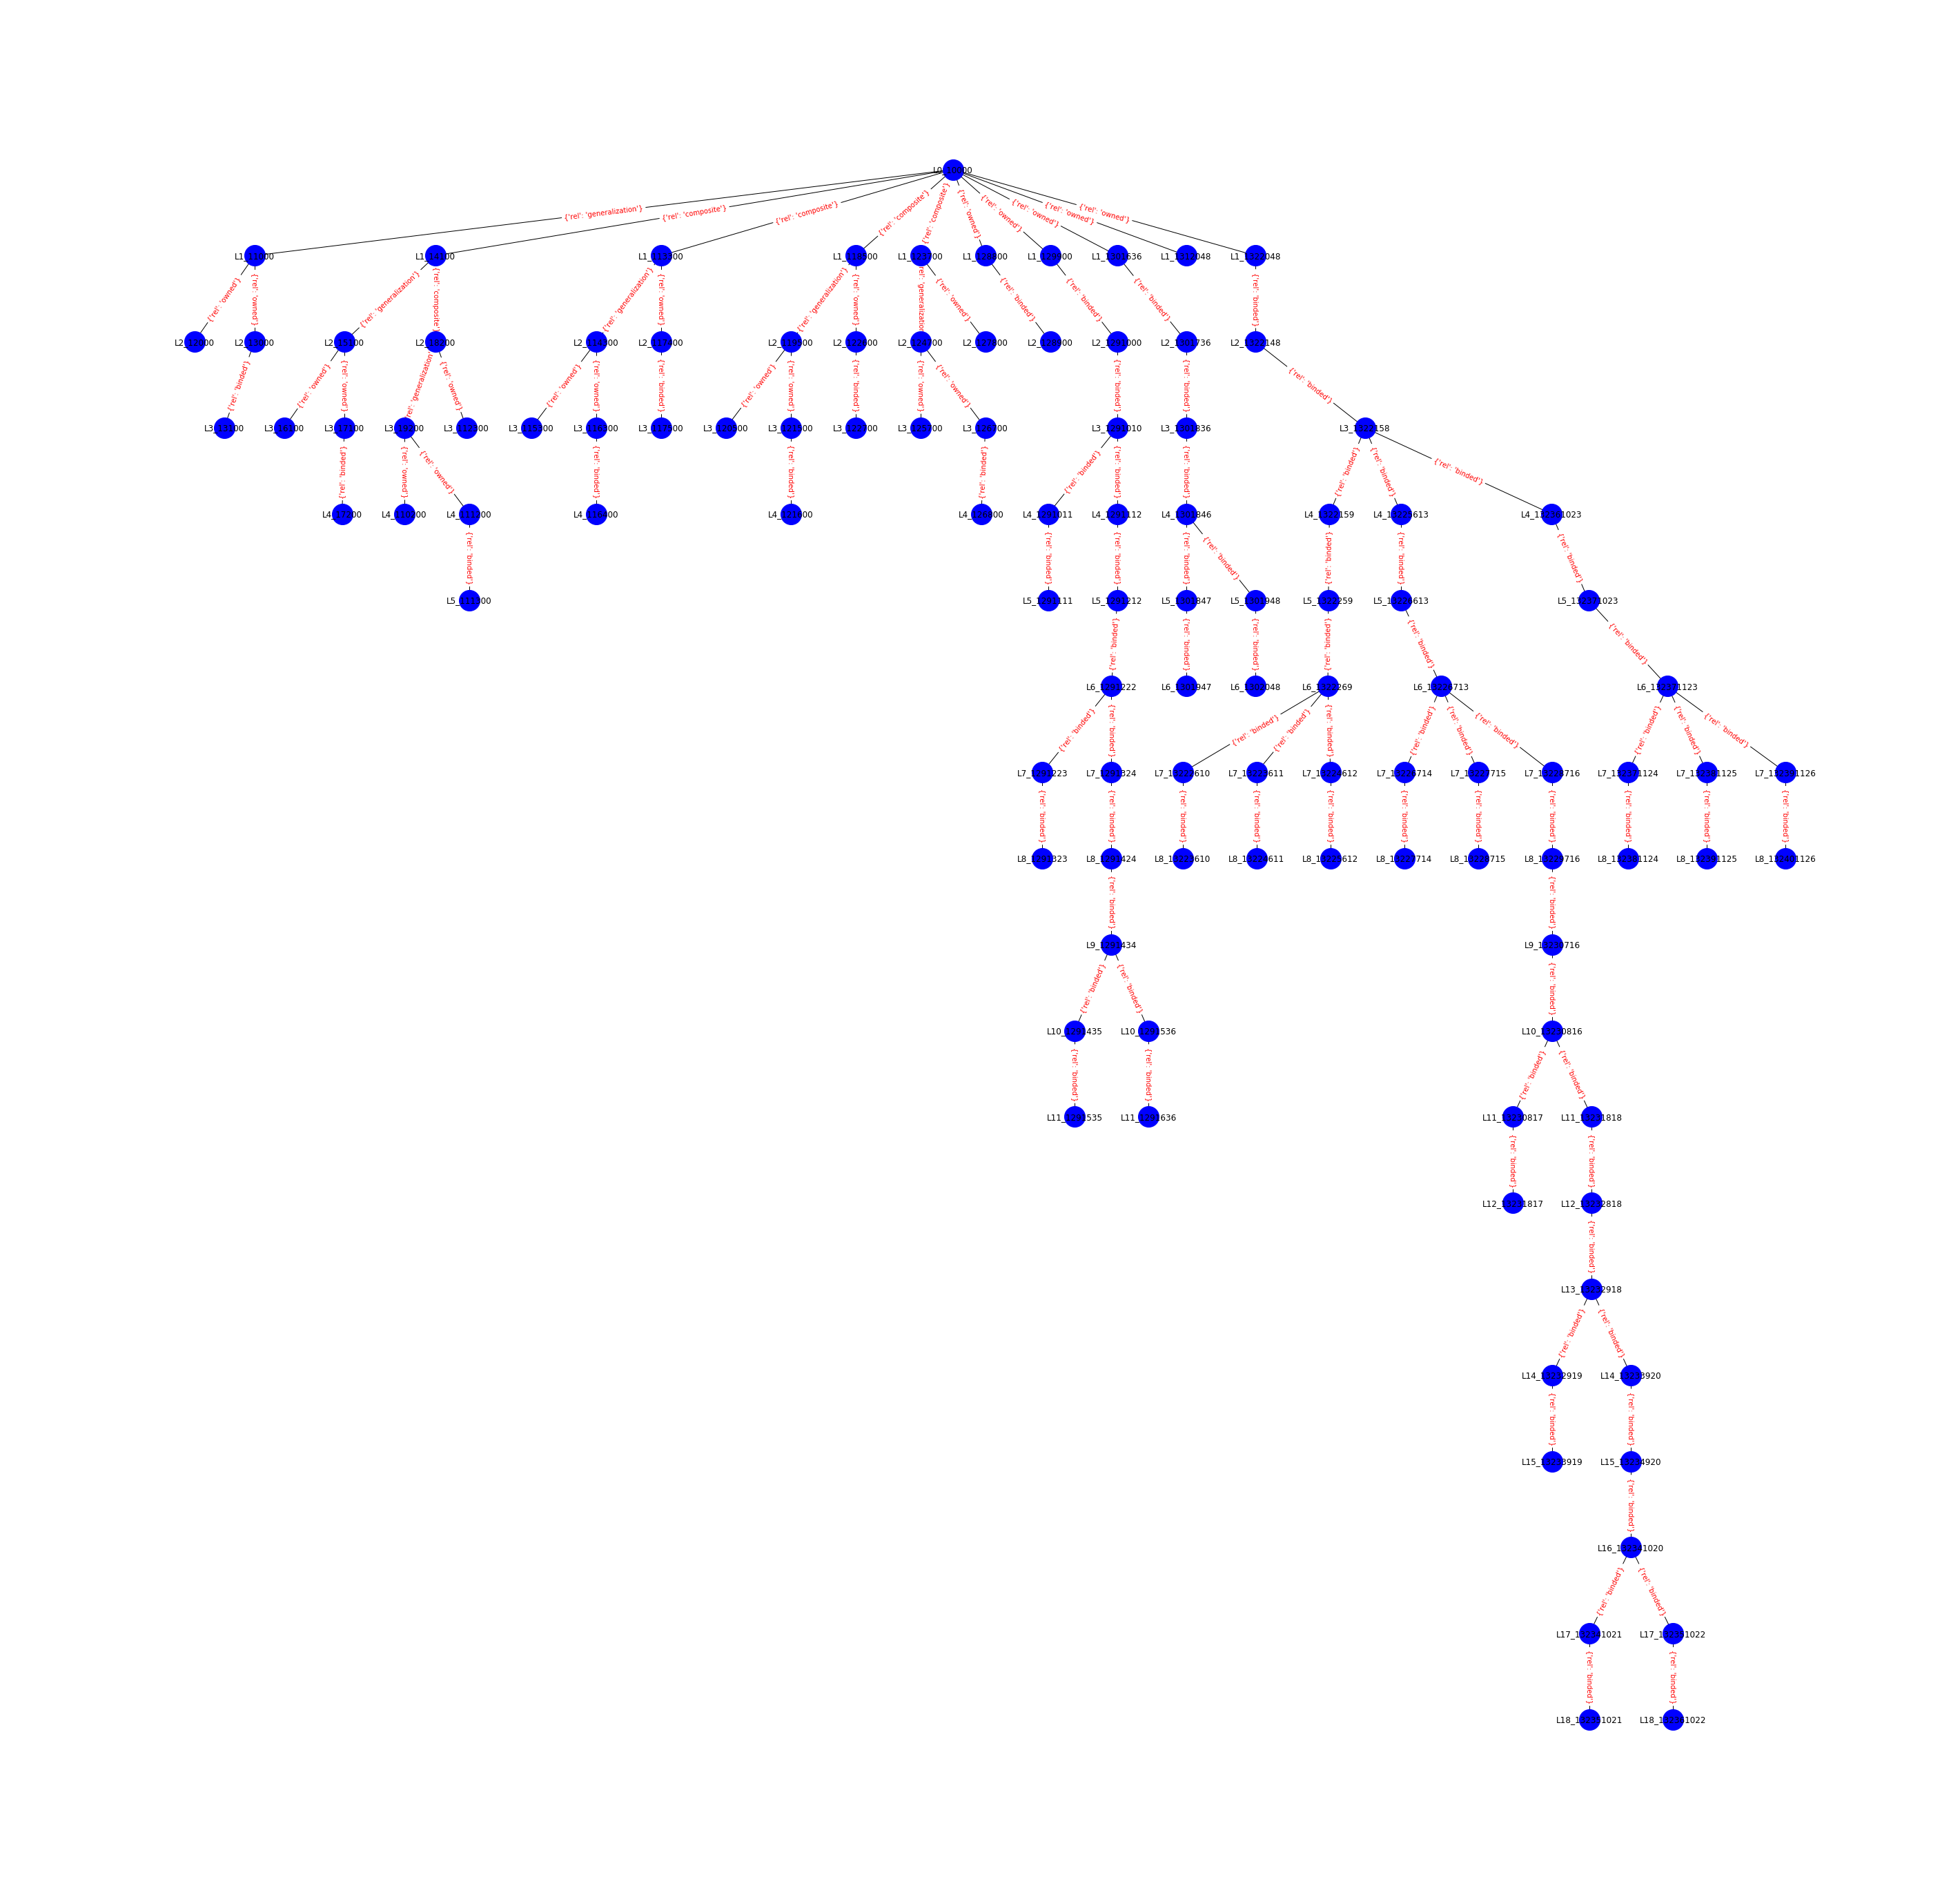

READ INSTANCES FROM CATALOG/BOM FILE
MaxRowSize: 7 MaxColSize: 3
Bicycle A {'name': 'typeA', 'mass': 6.27}
Bicycle B {'name': 'typeB', 'mass': 5.88}
Bicycle C {'name': 'typeC', 'mass': 9.2}
Bicycle D {'name': 'typeD', 'mass': 7.65}
Bicycle E {'name': 'typeE', 'mass': 12.9}
Bicycle F {'name': 'typeF', 'mass': 4.65}
Bicycle G {'name': 'typeG', 'mass': 10.2}
Controller A {'name': 'C1', 'mass': 2.0, 'amp': 3.0}
Controller B {'name': 'C2', 'mass': 4.5, 'amp': 4.0}
Controller C {'name': 'C3', 'mass': 5.4, 'amp': 10.0}
Controller D {'name': 'C4', 'mass': 3.7, 'amp': 6.0}
Controller E {'name': 'C5', 'mass': 2.6, 'amp': 9.0}
Motor A {'name': 'M1', 'mass': 3.5, 'outputWatt': 200.0}
Motor B {'name': 'M2', 'mass': 5.0, 'outputWatt': 250.0}
Motor C {'name': 'M3', 'mass': 4.0, 'outputWatt': 300.0}
Motor D {'name': 'M4', 'mass': 4.0, 'outputWatt': 350.0}
Motor E {'name': 'M5', 'mass': 2.7, 'outputWatt': 500.0}
Motor F {'name': 'M6', 'mass': 5.2, 'outputWatt': 750.0}
Power Source A {'name': 'batteryA'

In [7]:
########################################################################################################################
#Below this line is test area
"""
#Test Read StructureModel
"""
print("READ STRUCTURE MODEL")
#Input
SOI_NAME = "Electric Bicycle"
FILE_PATH = "Input/XMI/e-bicycle-190-v1.2-customstereotypes-hbb.xml"
OUTPUT_FILE_PATH = "Output/Results/Result" + str(DT.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")) + ".txt"  

tree = ET.parse(FILE_PATH)
root = tree.getroot()
structModel = XMI25Element.createNewStructureModel(SOI_NAME, root)

#Print to file
#file = open(OUTPUT_FILE_PATH,"w")
for obj in structModel:
    print(Colors.getFontColorByLevel(obj.level), Colors.BOLD, XPathHelper.getRepeatedChar("", obj.level), obj.stereotypes, "LV.", obj.level, Colors.ENDC, ", gene =", obj.gaGene, ", nId =", obj.nodeId, ", pId =", obj.parentNodeId, ", xmiId =", obj.xmiId, ", name =", obj.name, ", value =", obj.value, ", formula =", obj.formula )
    #file.write("")
print("\nNo. of element:", len(structModel), "DateTime:", str(DT.datetime.now()))

RNLTree.drawGraph(structModel)
    
"""
#Test Read Instance from ExcelFile
"""
print("READ INSTANCES FROM CATALOG/BOM FILE")
CATALOG_FILE_PATH = "Input/BOM/Catalogs.xlsx"

instances, maxRowSize, maxColSize = ExcelReader.readExcelFile(CATALOG_FILE_PATH)
instances = Instance.generateGeneSequentially(instances, maxRowSize)
print("MaxRowSize:", maxRowSize, "MaxColSize:", maxColSize)
for instance in instances:
    print(instance.insType, instance.gaGene, instance.parameters)

"""
#Test Genetic Algorithm
"""
print("RUN GENETIC ALGORITHMS")
IND_SIZE = 5 #We need to get it from the StructureModel
SIZE_OF_GENE = 1 #We need to get it from the StructureModel
NO_OF_BEST_SOLUTIONS = 5 #Get it from the User UI
NO_OF_GENERATIONS = 10 #Get it from the User UI
POPULATION_SIZE = 10 #Get it from the User UI

toolbox = base.Toolbox()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("attr_alphabet", GeneticAlgorithms.generateGeneRandomly, k=SIZE_OF_GENE)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_alphabet, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", GeneticAlgorithms.evaluation)

#Executes a one point crossover on the input sequence individuals.
#The two individuals are modified in place.
#The resulting individuals will respectively have the length of the other.
toolbox.register("mate", tools.cxOnePoint)

#Shuffle the attributes of the input individual and return the mutant.
#The individual is expected to be a sequence.
#The indpb argument is the probability of each attribute to be moved.
#Usually this mutation is applied on vector of indices.
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)

#Flip the value of the attributes of the input individual and return the mutant.
#The individual is expected to be a sequence and the values of the attributes shall stay valid after the not operator is called on them.
#The indpb argument is the probability of each attribute to be flipped.
#This mutation is usually applied on boolean individuals.
#toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)

#This function applies a gaussian mutation of mean mu and standard deviation sigma on the input individual.
#This mutation expects a sequence individual composed of real valued attributes.
#The indpb argument is the probability of each attribute to be mutated.
#toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)

toolbox.register("select", tools.selBest)

#Tool decoration is a very powerful feature that helps to control very precise things during an evolution
#without changing anything in the algorithm or operators.
chromosomeSeq = XMI25Element.getChromosomeSequence(structModel)
toolbox.decorate("mate", GeneticAlgorithms.checkExistence(chromosomeSeq, instances))
toolbox.decorate("mutate", GeneticAlgorithms.checkExistence(chromosomeSeq, instances))

pop = GeneticAlgorithms.customEvolution(POPULATION_SIZE, NO_OF_GENERATIONS, toolbox)
bests = tools.selBest(pop, k=NO_OF_BEST_SOLUTIONS)

#Print to file
file = open(OUTPUT_FILE_PATH,"w") 
print("\n############################################################")
print("\n", chromosomeSeq, "\nSolution\tFitness")
file.write(''.join(chromosomeSeq) + "\nSolution\tFitness\n")
for best in bests:
    print("\n", best, best.fitness)
    file.write(''.join(best) + "\t" + str(best.fitness) + "\n")
    
    #Create configuration for Solution(s)
    sm = copy.deepcopy(structModel)
    bestConf = Configuration.createNewConfiguration(sm, best, instances) #createNewConfiguration(structureModel, chromosome, instances)
    moes = XMI25Element.getElementsByStereotype(bestConf.structureModel, MOE)
    for moe in moes:
        print(moe.name, ":", moe.value, moe.unitOnValueType)
    
file.close()